In [1]:
# 필요한 라이브러리 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = 'C:\\Users\\82104\\Desktop\\데이터분석\\1. 신용카드 사용자 연체 예측\data\\train.csv'
test = 'C:\\Users\\82104\\Desktop\\데이터분석\\1. 신용카드 사용자 연체 예측\data\\test.csv'
df_train = pd.read_csv(train)
df_test = pd.read_csv(test)

In [3]:
df_train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
# 데이터 기초 정보탐색
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

<AxesSubplot:>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


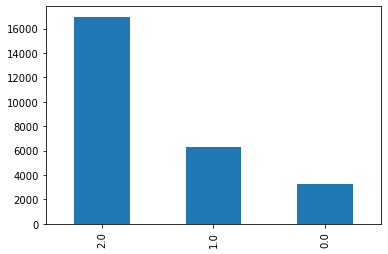

In [5]:
# credit 분포 정도확인
df_train['credit'].value_counts().plot.bar()

In [6]:
# 결측치 확인 >> occyp_type에만 있음 >> 31퍼센트가 결측치
print(df_train.isnull().sum())
occ_null_rate = 8171 / 26457
print('rate : %.2f'%occ_null_rate)

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64
rate : 0.31


In [7]:
# 더미변수화 전에 질적변수 별 몇개의 종류가 있는지 확인
# income_type
print(df_train['income_type'].unique())
print(df_train['edu_type'].unique())
print(df_train['family_type'].unique())
print(df_train['house_type'].unique())
print(df_train['occyp_type'].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
[nan 'Laborers' 'Managers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Drivers' 'Medicine staff' 'Accountants' 'Realty agents'
 'Security staff' 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Secretaries' 'HR staff' 'IT staff' 'Low-skill Laborers'
 'Waiters/barmen staff']


In [8]:
# 직업종류와 개수확인
df_train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

occyp_type
Accountants              1.486696
Cleaning staff           1.570720
Cooking staff            1.505470
Core staff               1.502646
Drivers                  1.535238
HR staff                 1.709677
High skill tech staff    1.503846
IT staff                 1.365854
Laborers                 1.500443
Low-skill Laborers       1.488189
Managers                 1.530226
Medicine staff           1.586806
Private service staff    1.485597
Realty agents            1.539683
Sales staff              1.513194
Secretaries              1.494845
Security staff           1.608491
Waiters/barmen staff     1.435484
Name: credit, dtype: float64


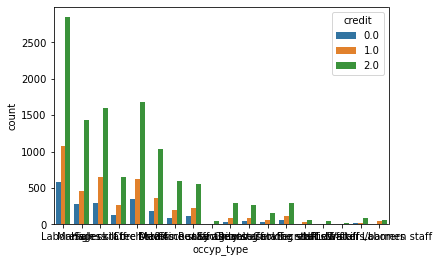

In [15]:
# 직업별 credit 차이가 있는지 확인
import seaborn as sns
print(df_train.groupby(['occyp_type'])['credit'].mean())
ax = sns.countplot(x='occyp_type',hue='credit',data=df_train)

In [16]:
# 전처리를 위해 train데이터와 test데이터 병합
whole_df = df_train.append(df_test)
# train 로우 개수 미리 확인(다시 나눠야 하니깐)
train_df_num = len(df_train)

In [18]:
# index 칼럼 삭제
whole_df = whole_df.drop('index',axis=1)

KeyError: "['index'] not found in axis"

In [19]:
# 데이터 전처리
# 1. Y,F를 1과 0으로 치환
whole_df.replace('Y',1,inplace=True)
whole_df.replace('N',0,inplace=True)
whole_df.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,0,0,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,F,0,1,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,M,1,1,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,F,0,1,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,1,1,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [52]:
whole_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         36457 non-null  object 
 1   car            36457 non-null  int64  
 2   reality        36457 non-null  int64  
 3   child_num      36457 non-null  int64  
 4   income_total   36457 non-null  float64
 5   income_type    36457 non-null  object 
 6   edu_type       36457 non-null  object 
 7   family_type    36457 non-null  object 
 8   house_type     36457 non-null  object 
 9   DAYS_BIRTH     36457 non-null  int64  
 10  DAYS_EMPLOYED  36457 non-null  int64  
 11  FLAG_MOBIL     36457 non-null  int64  
 12  work_phone     36457 non-null  int64  
 13  phone          36457 non-null  int64  
 14  email          36457 non-null  int64  
 15  occyp_type     25134 non-null  object 
 16  family_size    36457 non-null  float64
 17  begin_month    36457 non-null  float64
 18  credit 

In [20]:
# 일단 occyp_type 변수 제외한 데이터프레임 만들기
whole_df_n_occ = whole_df[whole_df.columns.difference(['occyp_type'])]
# occyp_type과 credit만 있는 프레임 만들기
df_occ_with_credit = whole_df[['occyp_type','credit']]
df_occ_with_credit.head()

,occyp_type,credit
0,NaN,1.0
1,Laborers,1.0
2,Managers,2.0
3,Sales staff,0.0
4,Managers,2.0


In [21]:
# 질적변수들 모두 더미변수화 진행(원핫인코딩)
whole_df_encoding = pd.get_dummies(whole_df_n_occ)
whole_df_encoding.head()

,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,begin_month,car,child_num,credit,email,family_size,income_total,...,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working
0,-13899,-4709,1,-6.0,0,0,1.0,0,2.0,202500.0,...,0,1,0,0,0,1,0,0,0,0
1,-11380,-1540,1,-5.0,0,1,1.0,1,3.0,247500.0,...,1,0,0,0,0,1,0,0,0,0
2,-19087,-4434,1,-22.0,1,0,2.0,0,2.0,450000.0,...,1,0,0,0,0,0,0,0,0,1
3,-15088,-2092,1,-37.0,0,0,0.0,0,2.0,202500.0,...,1,0,0,0,0,1,0,0,0,0
4,-15037,-2105,1,-26.0,1,0,2.0,0,2.0,157500.0,...,1,0,0,0,0,0,0,1,0,0


In [22]:
# 양적 변수들 스케일링 진행해야함(여기서 credit은 빼주어야한다)
columns = ['DAYS_BIRTH','income_total','DAYS_EMPLOYED','family_size','begin_month']

def scalingdf(df,columns):
    for col in columns:
        mean = df[col].mean()
        std = df[col].std()
        df[col] = df[col].apply(lambda x:(x-mean)/std)
    return df

# 스케일링 진행
scalingdf(whole_df_encoding,columns)

,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,begin_month,car,child_num,credit,email,family_size,income_total,...,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working
0,0.494262,-0.464739,1,1.221935,0,0,1.0,0,-0.217677,0.155363,...,0,1,0,0,0,1,0,0,0,0
1,1.093946,-0.441717,1,1.282534,0,1,1.0,1,0.879192,0.597453,...,1,0,0,0,0,1,0,0,0,0
2,-0.740814,-0.462741,1,0.252347,1,0,2.0,0,-0.217677,2.586858,...,1,0,0,0,0,0,0,0,0,1
3,0.211204,-0.445727,1,-0.656642,0,0,0.0,0,-0.217677,0.155363,...,1,0,0,0,0,1,0,0,0,0
4,0.223345,-0.445822,1,0.009950,1,0,2.0,0,-0.217677,-0.286727,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.623210,-0.470006,1,0.434145,1,0,NaN,0,-0.217677,0.155363,...,1,0,0,0,0,0,0,0,0,1
9996,1.211549,-0.440082,1,-0.474844,1,0,NaN,0,-0.217677,0.155363,...,1,0,0,0,0,0,0,0,0,1
9997,-1.200040,-0.532366,1,-1.747428,0,0,NaN,0,-0.217677,1.039543,...,1,0,0,0,0,0,0,0,0,1
9998,-0.134703,-0.438412,1,-0.414245,1,0,NaN,0,-0.217677,-0.065682,...,1,0,0,0,0,1,0,0,0,0


In [53]:
whole_df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   DAYS_BIRTH                              36457 non-null  float64
 1   DAYS_EMPLOYED                           36457 non-null  float64
 2   FLAG_MOBIL                              36457 non-null  int64  
 3   begin_month                             36457 non-null  float64
 4   car                                     36457 non-null  int64  
 5   child_num                               36457 non-null  int64  
 6   credit                                  26457 non-null  float64
 7   email                                   36457 non-null  int64  
 8   family_size                             36457 non-null  float64
 9   income_total                            36457 non-null  float64
 10  phone                                   36457 non-null  int

In [23]:
# 다시 데이터 트레인과 test로 분리
df_train = whole_df_encoding[:train_df_num]
df_test = whole_df_encoding[train_df_num:]

In [24]:
df_train.head()
# train데이터와 검증용 데이터로 분리

,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,begin_month,car,child_num,credit,email,family_size,income_total,...,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working
0,0.494262,-0.464739,1,1.221935,0,0,1.0,0,-0.217677,0.155363,...,0,1,0,0,0,1,0,0,0,0
1,1.093946,-0.441717,1,1.282534,0,1,1.0,1,0.879192,0.597453,...,1,0,0,0,0,1,0,0,0,0
2,-0.740814,-0.462741,1,0.252347,1,0,2.0,0,-0.217677,2.586858,...,1,0,0,0,0,0,0,0,0,1
3,0.211204,-0.445727,1,-0.656642,0,0,0.0,0,-0.217677,0.155363,...,1,0,0,0,0,1,0,0,0,0
4,0.223345,-0.445822,1,0.009950,1,0,2.0,0,-0.217677,-0.286727,...,1,0,0,0,0,0,0,1,0,0


In [25]:
# 필요한 라이브러리 설치
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df_train['credit']
# X는 행렬이므로 대문자로 표시
X = df_train[df_train.columns.difference(['credit'])]

# 학습용과 검증용 데이터로 8:2 로 나눔
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.2,random_state= 1)

In [26]:
# 모델 학습
model = LogisticRegression(solver='liblinear', multi_class='auto',
                       C=100.0, random_state=1)
model.fit(X_train,y_train)

model2 = LogisticRegression(solver='newton-cg',random_state=1,multi_class= 'multinomial',C=100)
model2.fit(X_train,y_train)

# 모델 검증
y_pred = model.predict(X_test)
y_pred_probability = model.predict_proba(X_test)
y_pred2 = model2.predict(X_test)
y_pred_probability2 = model2.predict_proba(X_test)
print('전체 샘플 개수: %d'% y_test.sum())
print('잘못 분류된 샘플 개수(모델1): %d' % (y_test != y_pred).sum())
print('잘못 분류된 샘플 개수(모델2): %d' % (y_test != y_pred2).sum())

전체 샘플 개수: 8035
잘못 분류된 샘플 개수(모델1): 1903
잘못 분류된 샘플 개수(모델2): 1901


In [44]:
#랜덤 포레스트 모델 학습
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1,n_estimators=1000)

model_rf.fit(X_train,y_train)
y_pred3 = model_rf.predict(X_test)
print('잘못 분류된 샘플 개수(랜덤포레스트): %d' % (y_test != y_pred3).sum())

잘못 분류된 샘플 개수(랜덤포레스트): 1577


<AxesSubplot:>

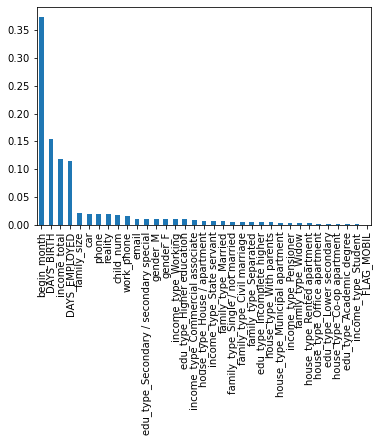

In [55]:
# 피처별 중요도
feature_scores = pd.Series(model_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores.plot.bar()

In [48]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정 나무를 학습하고, 학습한 모델로 테스트 데이터셋에 대한 예측값을 반환
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train,y_train)
y_pred4 = dtc.predict(X_test)
print('잘못 분류된 샘플 개수(의사결정트리): %d' % (y_test != y_pred4).sum())

잘못 분류된 샘플 개수(의사결정트리): 2068


In [49]:
# 분류모델의 평가
print("로지스틱회귀모델1 Accuracy: %.2f"% accuracy_score(y_test,y_pred))
print("로지스틱회귀모델2 Accuracy: %.2f"% accuracy_score(y_test,y_pred2))
print("랜덤포레스트모델 Accuracy: %.2f"% accuracy_score(y_test,y_pred3))
print("의사결정트리모델 Accuracy: %.2f"% accuracy_score(y_test,y_pred4))
#### 이까지함

로지스틱회귀모델1 Accuracy: 0.64
로지스틱회귀모델2 Accuracy: 0.64
랜덤포레스트모델 Accuracy: 0.70
의사결정트리모델 Accuracy: 0.61


In [43]:
y_test
y_pred 

array([2., 2., 2., ..., 2., 2., 2.])